# Propriétés d'une population fictive: analyse univariée quantitative (ages)

Version du 7 mars 2024.

130 / 900 individus, cinq caractères: age, genre, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [88]:
### Lire le fichier corrigé manuellement – ne pas effacer ce fichier !


# Alternative: 'data/observations_mod.csv'
path = 'data/observations_900.csv'

observations = pd.read_csv(path)
observations.set_index('id', inplace=True)
observations.head()

,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,5515,trois-quatre fois par semaine,populiste
4,26,H,1876,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,gauche


In [3]:
## Nombre de lignes et de colonnes du tableau
observations.shape

(900, 5)

In [4]:
### Nombre de lignes du tableau
obs = observations
#obs = observations # 900
len(obs)

900

### Afficher et inspecter les données: âge

In [5]:
### On crée une variable qui contient seulement la colonne 'âge'
#  c'est-à-dire la pandas.Series, la série ou liste de données 'âge'
age = obs['age']
type(age), age.head()

(pandas.core.series.Series,
 id
 1    87
 2    31
 3    79
 4    26
 5    75
 Name: age, dtype: int64)

In [6]:
### Noter la différence de type: DataFrame et Series
# Les méthodes sont parfois communes, parfois spécifiques
type(obs), type(age)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: xlabel='id'>

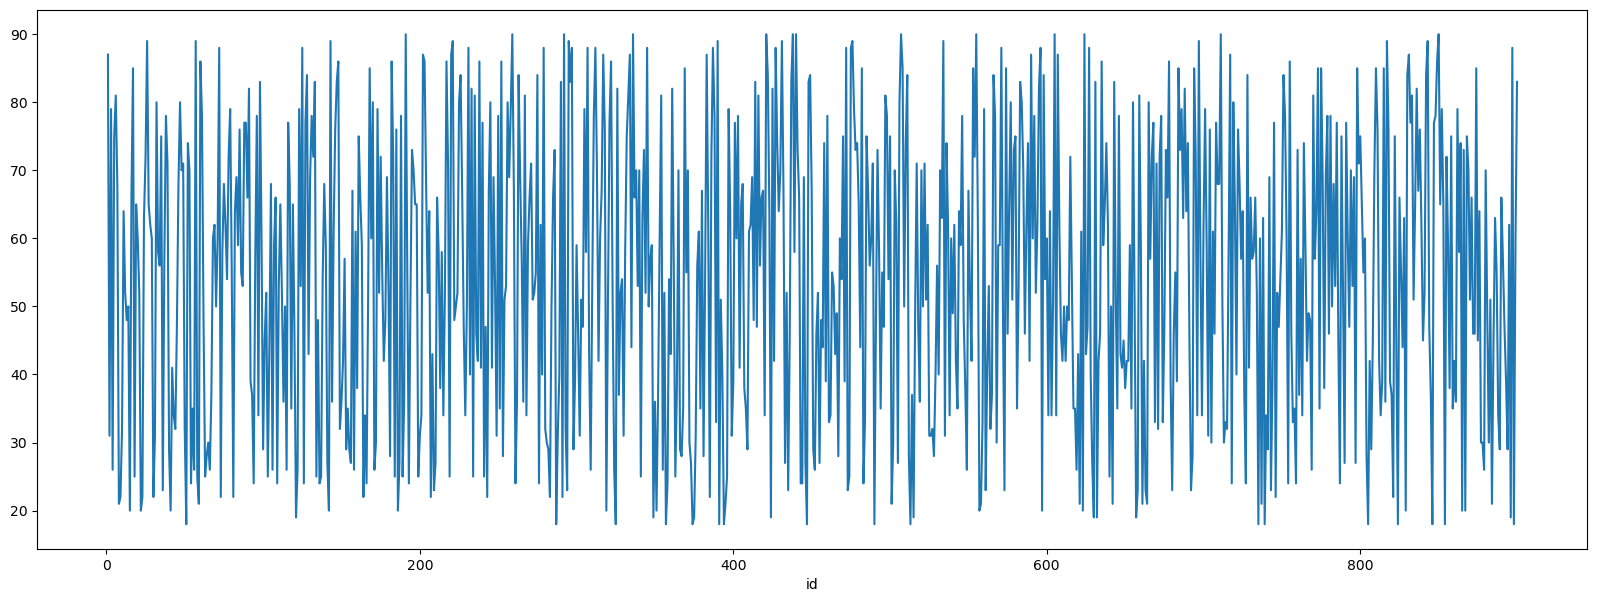

In [7]:
### Représentation par défaut en mode ligne à éviter (!!!) dans ce cas:
#  des surfaces sans sens
age.plot(figsize=(20,7))

<Axes: xlabel='id'>

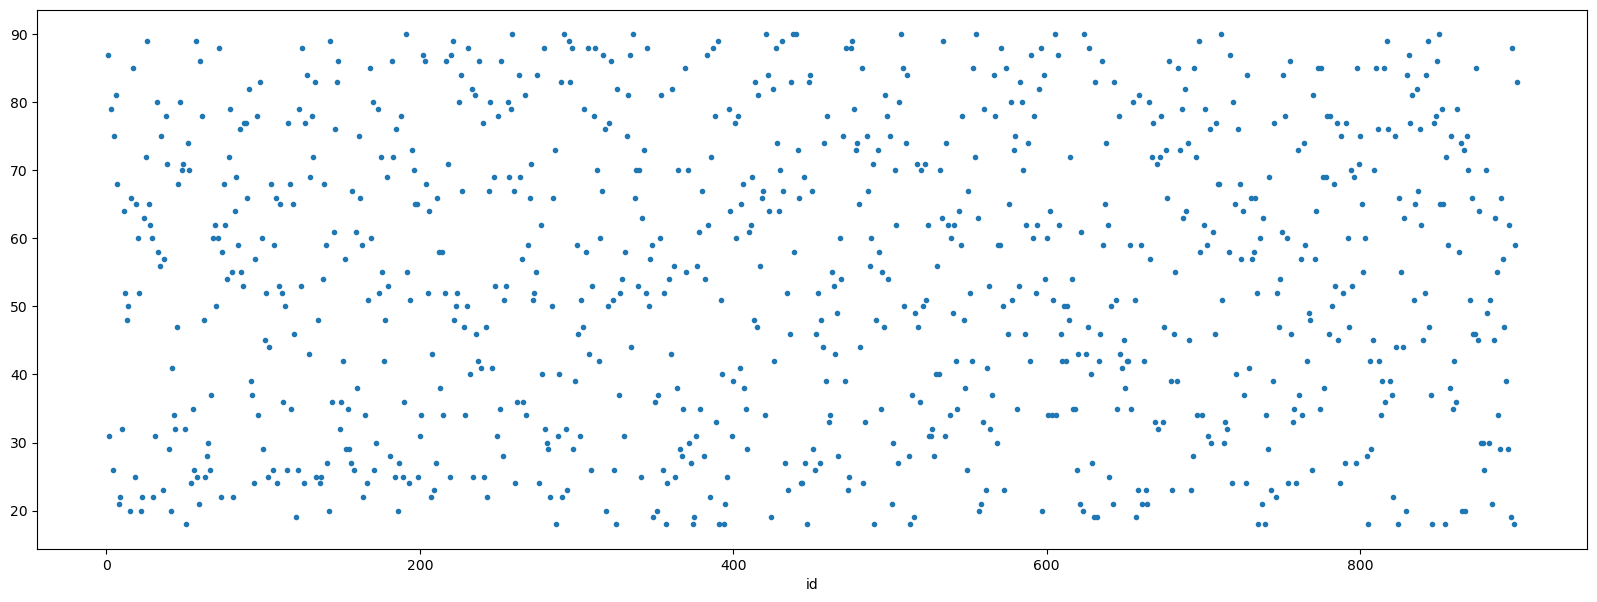

In [8]:
### Les individus en abscisses avec leur age en ordonnées:
#  type de représentation à éviter (!) dans ce cas
age.plot(style='.',figsize=(20,7))

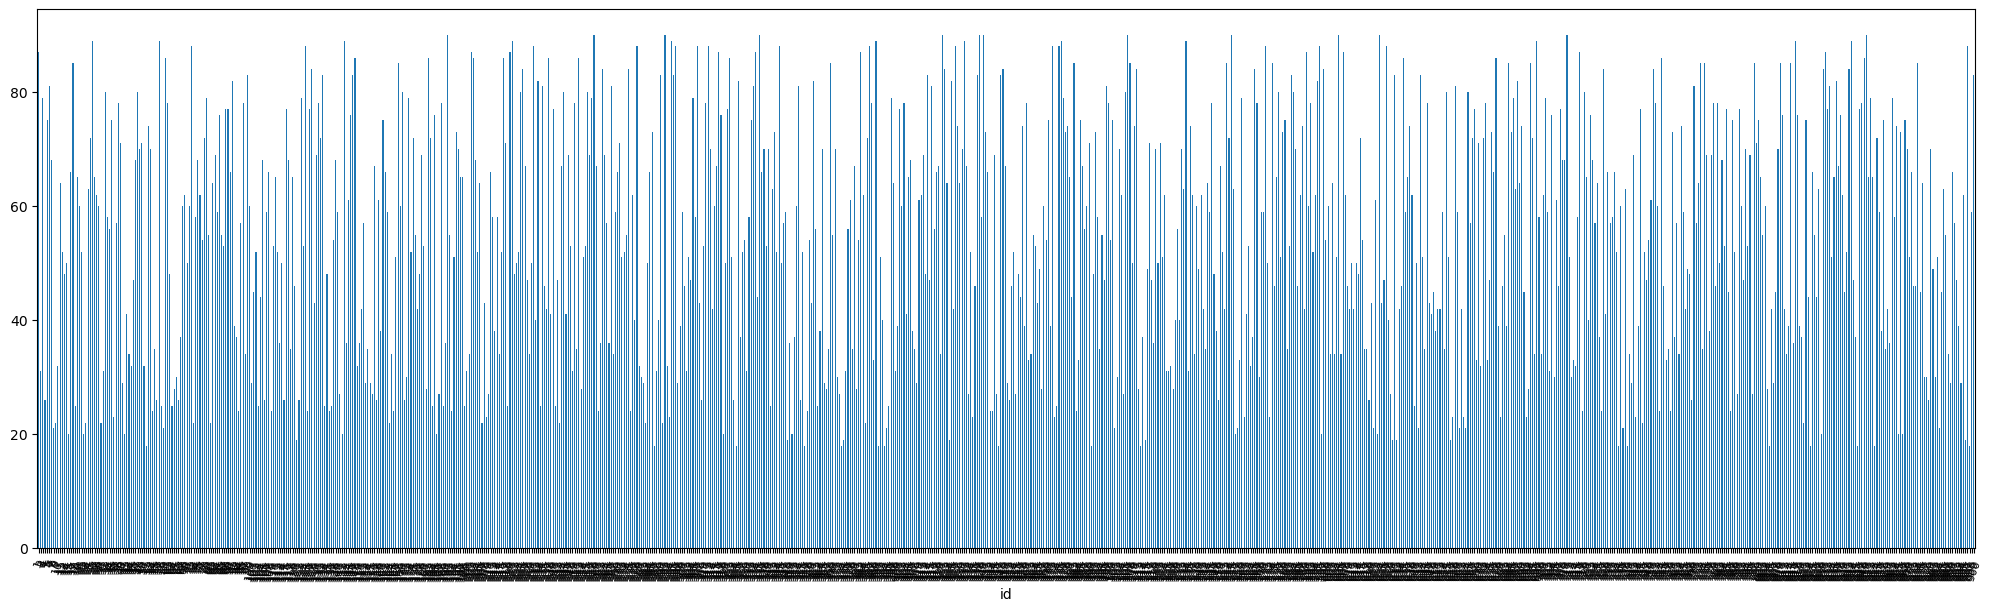

In [9]:
### Avec le diagramme à barres on a une 'image' plus parlante
# de l'age des individus mais illisible sans tri — il s'agira donc de trier
ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [10]:
### Tri ascendant des valeurs
#  Pour le tri déscendant, 
#  mettre en argument de la fonction sort_values: ascending=False
s_age = age.sort_values() 
print(s_age.head(), '\n\n Min/max age:', s_age.min(), s_age.max())

id
325    18
447    18
805    18
898    18
735    18
Name: age, dtype: int64 

 Min/max age: 18 90


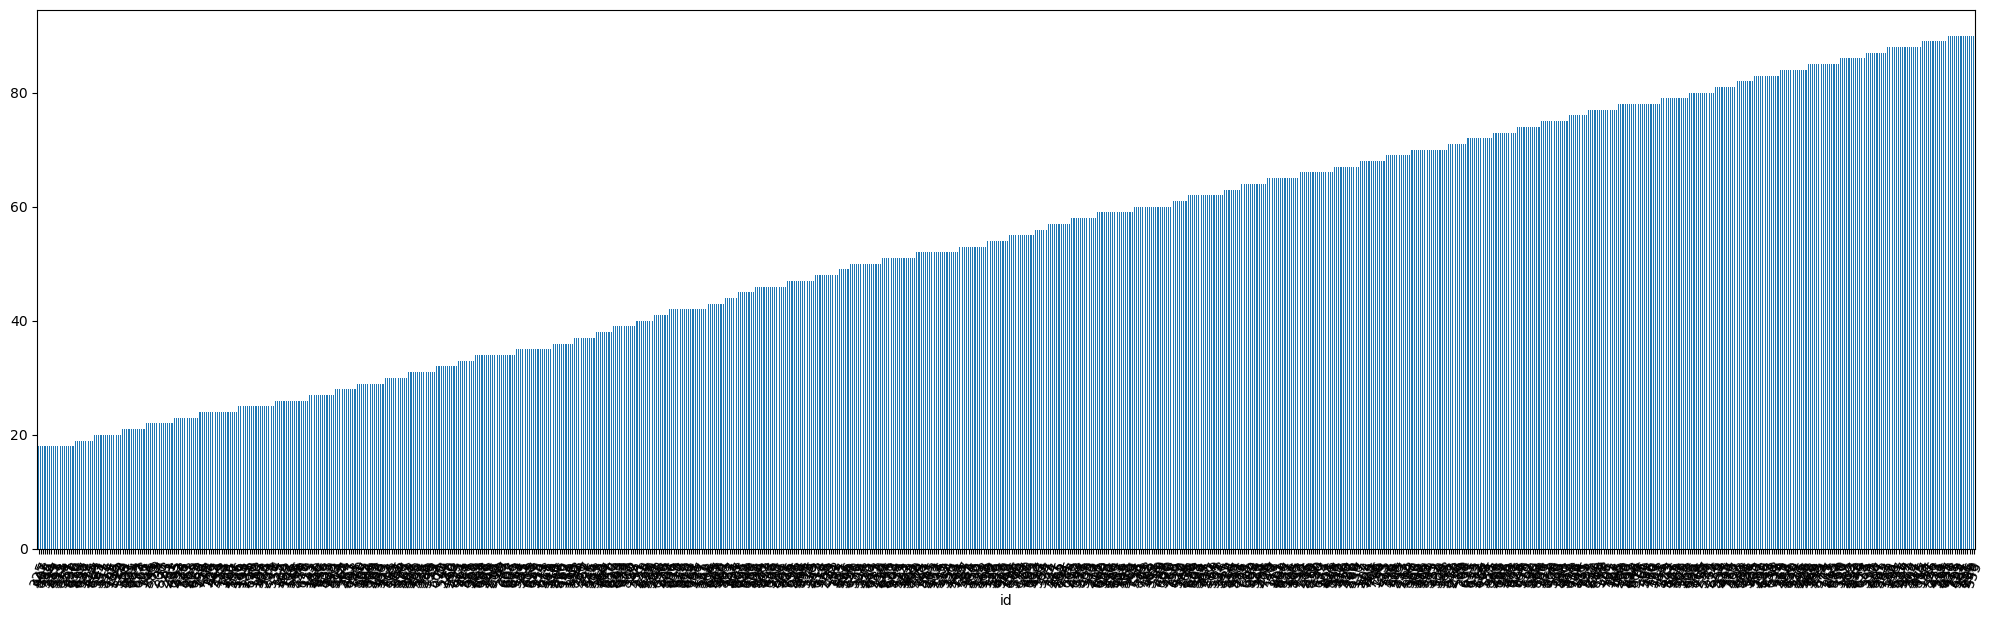

In [11]:
### Cette visualisation donne une impression de la croissance des âges
x = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car, étant donné la quantité de valeurs différentes, on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les _années_ étant dans les _classes_ de valeurs, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins pour les naissances d'une population telle que celle-ci.



In [12]:
### Regrouper par âge et compter les individus par valeur
# Distribution par valeur de l'age !
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    17
19     9
20    13
21    11
22    13
Name: age, dtype: int64

In [13]:
### Transformer la serie en dataFrame
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.columns = ['effectif']
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,effectif
age,
18,17
19,9
20,13
21,11
22,13


In [14]:
### Renommer la colonne
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18         17
 19          9
 20         13
 21         11
 22         13,
 Int64Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [21]:
### Ajouter les effectifs cumulés
# On ajoute à un cellule la valeur de la précédente
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule
age,,
18,17,17
19,9,26
20,13,39
21,11,50
22,13,63


### Fréquence et fréquence cumulée

In [22]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,17,17,1.89
19,9,26,1.00
20,13,39,1.44
21,11,50,1.22
22,13,63,1.44


In [23]:
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,17,17,1.89,1.89
19,9,26,1.00,2.89
20,13,39,1.44,4.33
21,11,50,1.22,5.56
22,13,63,1.44,7.00


In [24]:
### Le centre de la population, partie inférieure
df_cs_age[df_cs_age['frequence_cumulee']<= 50].tail(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
51,16,408,1.78,45.33
52,20,428,2.22,47.56
53,13,441,1.44,49.00


In [25]:
### Le centre de la population, partie supérieure
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
54,10,451,1.11,50.11
55,12,463,1.33,51.44
56,6,469,0.67,52.11


### Représentations graphiques

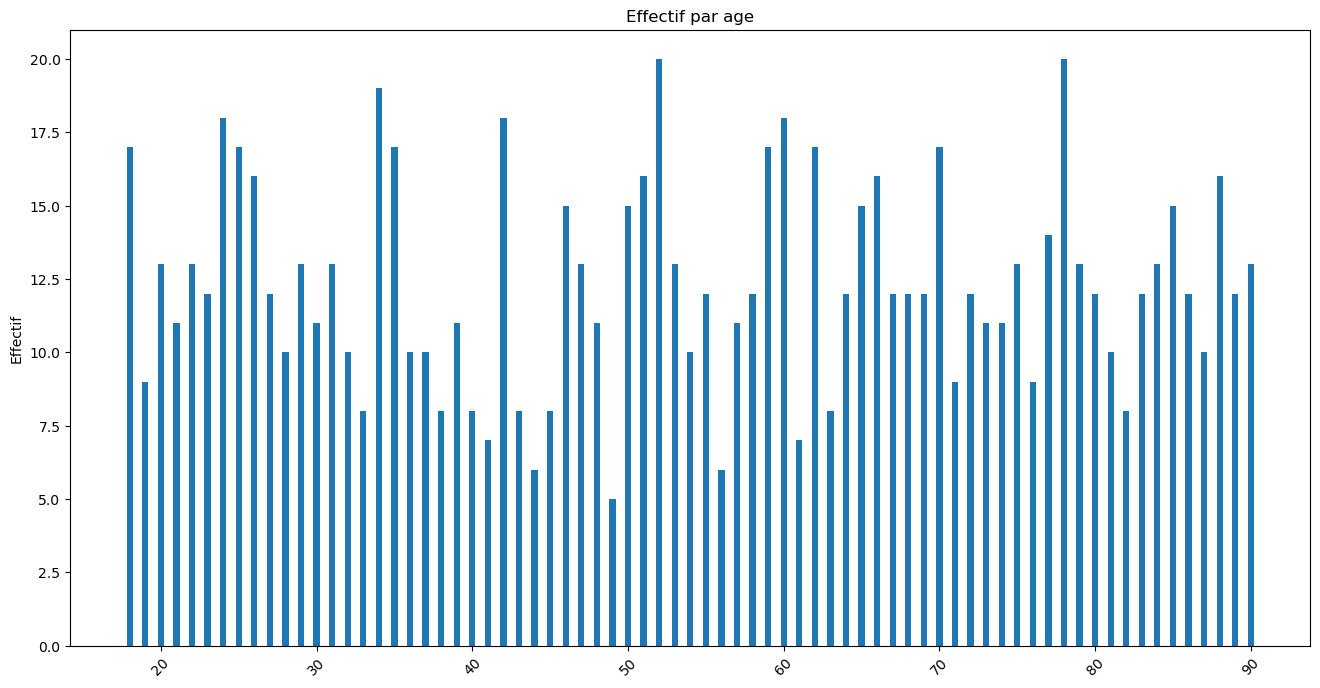

In [26]:
# Distribution des effectifs par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


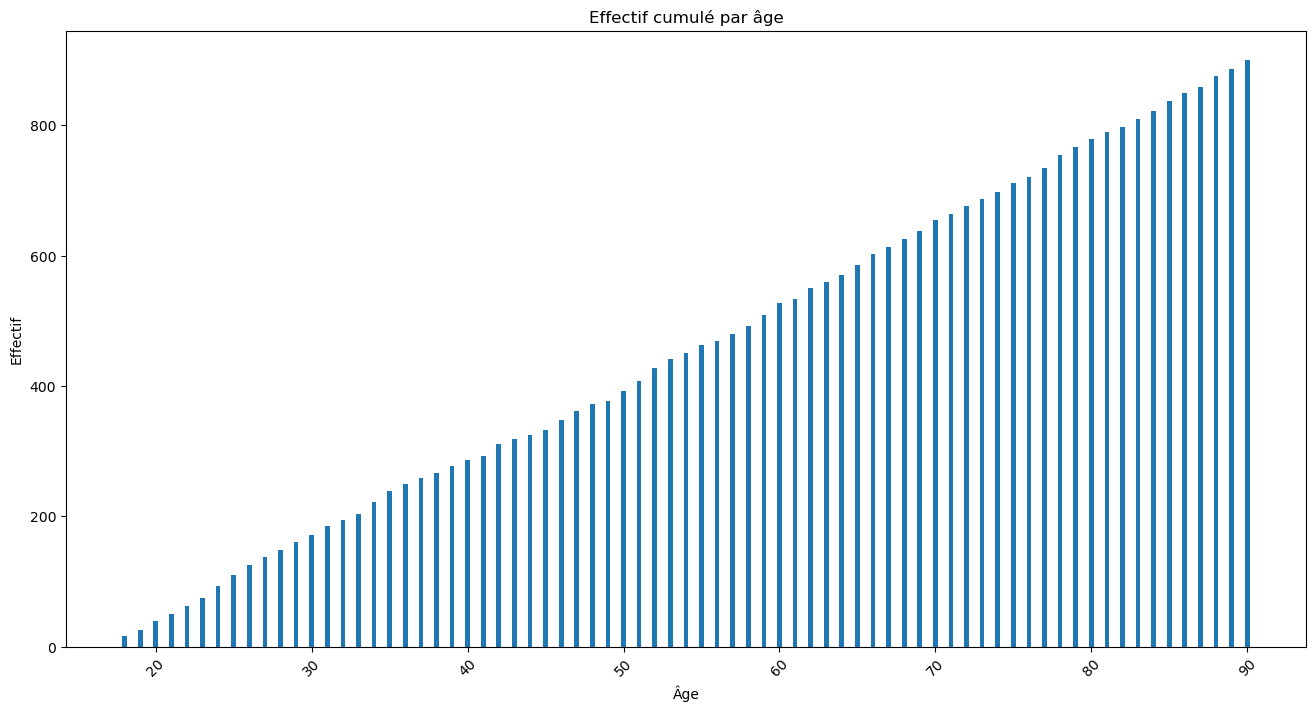

In [27]:
# Effectifs cumulés par âge

objects = df_cs_age.index
eff = df_cs_age['effectif_cumule']
#eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('Âge')
plt.title('Effectif cumulé par âge')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


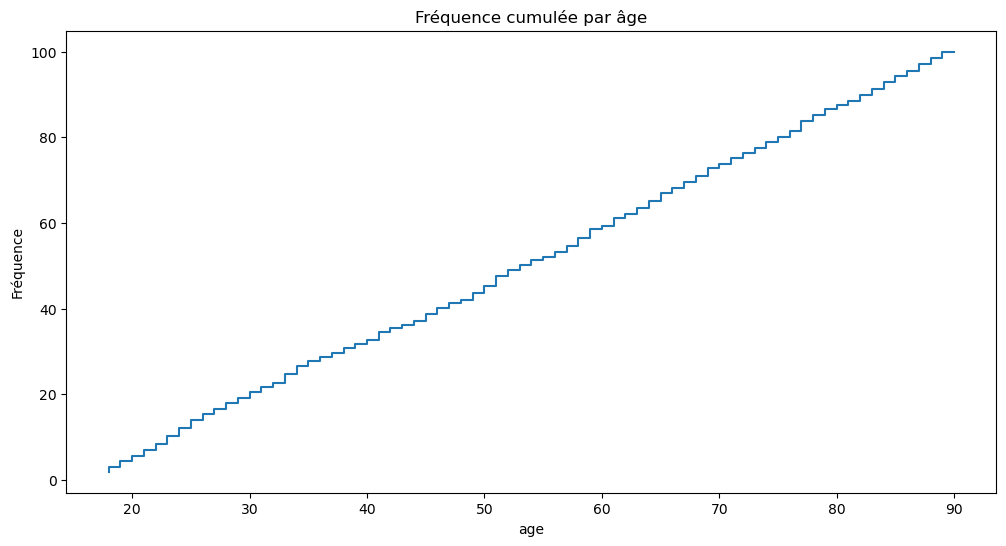

In [28]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 45 ans,
#  i.e. que la moitié de la population a moins de 45 ans, le reste plus 
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
df_cs_age['frequence_cumulee'].plot(figsize=(12,6), drawstyle='steps') #  style='o--',
plt.draw()

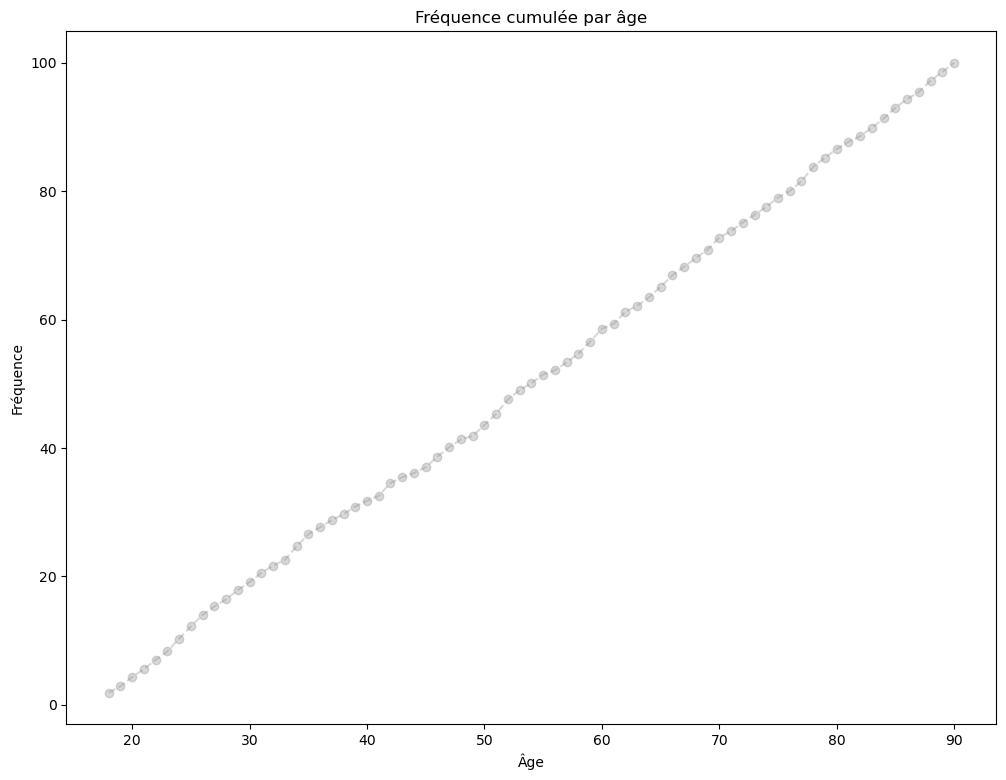

In [40]:
### Deux représentations graphiques différentes pour la même croissance.
# noter qu'à identité de données l'impression visuelle est légèrement différente,
# on voit mieux les moments de croissance plus ou moins forte
# Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
x = df_cs_age.index
y = df_cs_age['frequence_cumulee']
fig = plt.figure(figsize=[12,9])
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
### Commenter l'une des deux lignes suivantes pour voire la différence
#plt.step(x, y, label='pre (default)')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)
plt.show()

In [41]:
list(range(30, 40))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [31]:
### Filtrer en fonction d'âges différents
# filtre sur l'index, on pourrait transformer l'âge en colonne de valeurs
# en ajoutant un index
df_cs_age[df_cs_age.index.isin(list(range(30, 40)))]

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
30,11,172,1.22,19.11
31,13,185,1.44,20.56
32,10,195,1.11,21.67
33,8,203,0.89,22.56
34,19,222,2.11,24.67
35,17,239,1.89,26.56
36,10,249,1.11,27.67
37,10,259,1.11,28.78
38,8,267,0.89,29.67


In [42]:
### Le centre de la population, partie supérieure
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
54,10,451,1.11,50.11
55,12,463,1.33,51.44
56,6,469,0.67,52.11


## Paramètres de centralité et de dispersion

In [43]:
### Cette méthode d'une série fournit les caractéristiques
#  de tendance centrale et de dispersion
# À avoir toujours sous la main pour les variables quantitatives 
age.describe()

count    900.000000
mean      54.055556
std       21.382611
min       18.000000
25%       35.000000
50%       54.000000
75%       72.000000
max       90.000000
Name: age, dtype: float64

In [44]:
### La valeur la plus fréquente
age.mode()[0]

52

In [46]:
### Quel effectif a-t-elle ?
len(age[age == 52])

20

<Axes: >

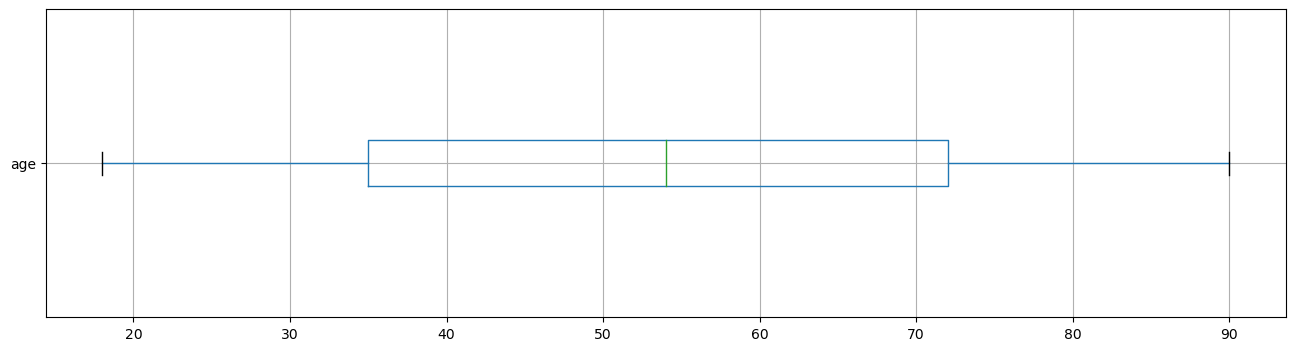

In [47]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

In [48]:
### Calcul des valeurs extrêmes
# NB Il n'y en a parmi les valeurs de cette variable 
q1 = age.quantile(q=0.25); print(f'Première quartile: {q1}')
q2 = age.quantile(q=0.5); print(f'Médiane: {q2}')
q3 = age.quantile(q=0.75); print(f'Troisième quartile: {q3}')
print('-----')
distance_inter_quantile = q3-q1
print(f'Ecart interquartile = {distance_inter_quantile};  Multiplié par 1.5 = {distance_inter_quantile*1.5}')
print('Valeurs extrèmes:')
extr_inf = q1 - distance_inter_quantile * 1.5; print(f'Limite inférieure = {extr_inf}, valeur minimale réelle: {min(age)}')
extr_sup = q3 + distance_inter_quantile * 1.5; print(f'Limite supérieure = {extr_sup}, valeur maximale réelle: {max(age)}')

Première quartile: 35.0
Médiane: 54.0
Troisième quartile: 72.0
-----
Ecart interquartile = 37.0;  Multiplié par 1.5 = 55.5
Valeurs extrèmes:
Limite inférieure = -20.5, valeur minimale réelle: 18
Limite supérieure = 127.5, valeur maximale réelle: 90


(18.0, 90.0)

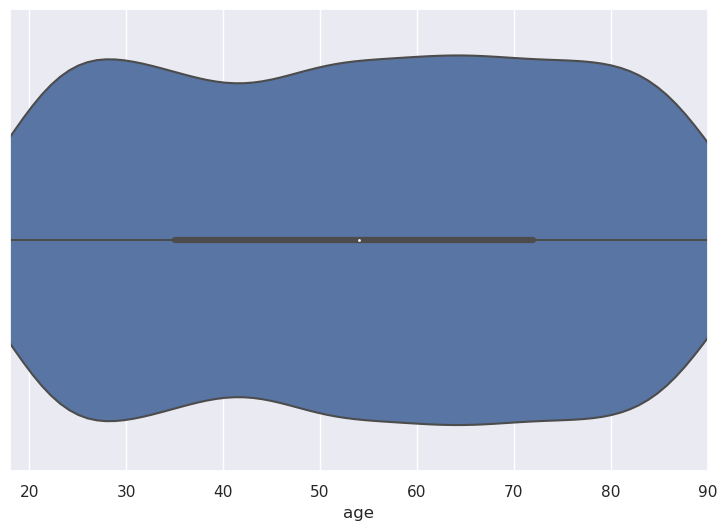

In [49]:
### Violinplot : rend visible la différente densité de la distribution
#  https://mode.com/blog/violin-plot-examples/
#  https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(9,6)})


a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))



### Histogramme

Observer les différents découpages des âges (générations) qui suivent et des effectifs respectifs:

lequel est le plus pertinent scientifiquement ?


In [50]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
c_obs = obs.copy(deep=True)

In [59]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec des classes significatives au point de vue heuristique du domaine étudié,
# modifiables en fonction de la problématique 
# Par exemple: en formation, jeunes travailleurs, travailleurs expérimentés, travailleurs seniors, préretraite, retraités
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs['generation_heur'] = pd.cut(c_obs['age'], generations, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['generation_heur'] = c_obs['generation_heur'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur
id,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90
2,31,H,4466,de temps en temps,gauche,26-35
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90


In [60]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec une amplitude identique des classes
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_cut'] = pd.cut(c_obs['age'], 5, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_cut'] = c_obs['generation_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut
id,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,75-89
2,31,H,4466,de temps en temps,gauche,26-35,18-31
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,75-89


In [61]:
### Ajouter une colonne avec codage des années de naissance 
# en relation de classes avec effectifs identiques ou proches
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_qcut'] = pd.qcut(c_obs['age'], 5)  
 
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_qcut'] = c_obs['generation_qcut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut
id,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,75-89,76-89
2,31,H,4466,de temps en temps,gauche,26-35,18-31,17-30
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,75-89,76-89


### Amplitudes et effectifs

In [62]:
### Lister les categories
c = c_obs['generation_heur'].unique(); print(c)
list(c.categories)

['66-90', '26-35', '18-25', '56-65', '46-55', '36-45']
Categories (6, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '66-90']


['18-25', '26-35', '36-45', '46-55', '56-65', '66-90']

In [63]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Pertinent en fonction de critères de domaine liés à l'âge
gb_generation_heur = pd.DataFrame(c_obs.groupby('generation_heur').size())
gb_generation_heur.columns = ['effectif']
gb_generation_heur

,effectif
generation_heur,
18-25,110
26-35,129
36-45,94
46-55,130
56-65,123
66-90,314


In [64]:
### Lister les categories
c = c_obs['generation_cut'].unique(); print(c)
list(c.categories)

['75-89', '18-31', '61-74', '46-60', '32-45']
Categories (5, object): ['18-31' < '32-45' < '46-60' < '61-74' < '75-89']


['18-31', '32-45', '46-60', '61-74', '75-89']

In [65]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Amplitude égale mais effectifs différents: le moins significatif scientifiquement?
gb_generation_cut = pd.DataFrame(c_obs.groupby('generation_cut').size())
gb_generation_cut.columns = ['effectif']
gb_generation_cut

,effectif
generation_cut,
18-31,195
32-45,153
46-60,186
61-74,177
75-89,189


In [66]:
### Lister les categories
c = c_obs['generation_qcut'].unique(); print(c)
list(c.categories)

['76-89', '17-30', '62-75', '31-46', '47-61']
Categories (5, object): ['17-30' < '31-46' < '47-61' < '62-75' < '76-89']


['17-30', '31-46', '47-61', '62-75', '76-89']

In [67]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Les effectifs sont presque identiques, l'amplitude des classes en découle
gb_generation_qcut = pd.DataFrame(c_obs.groupby('generation_qcut').size())
gb_generation_qcut.columns = ['effectif']
gb_generation_qcut

,effectif
generation_qcut,
17-30,185
31-46,176
47-61,190
62-75,169
76-89,180


## Représentation graphique: Diagramme à barres

Comparer les différents cas de figure, en utilisant alternativement l'un ou l'autre scénario de classement

In [72]:
objects = [l for l in gb_generation_heur.index]
eff = [l for l in gb_generation_heur['effectif']]
nom = 'heur'

In [77]:
objects = [l for l in gb_generation_cut.index]
eff = [l for l in gb_generation_cut['effectif']]
nom ='cut'

In [79]:
objects = [l for l in gb_generation_qcut.index]
eff = [l for l in gb_generation_qcut['effectif']]
nom = 'qcut'

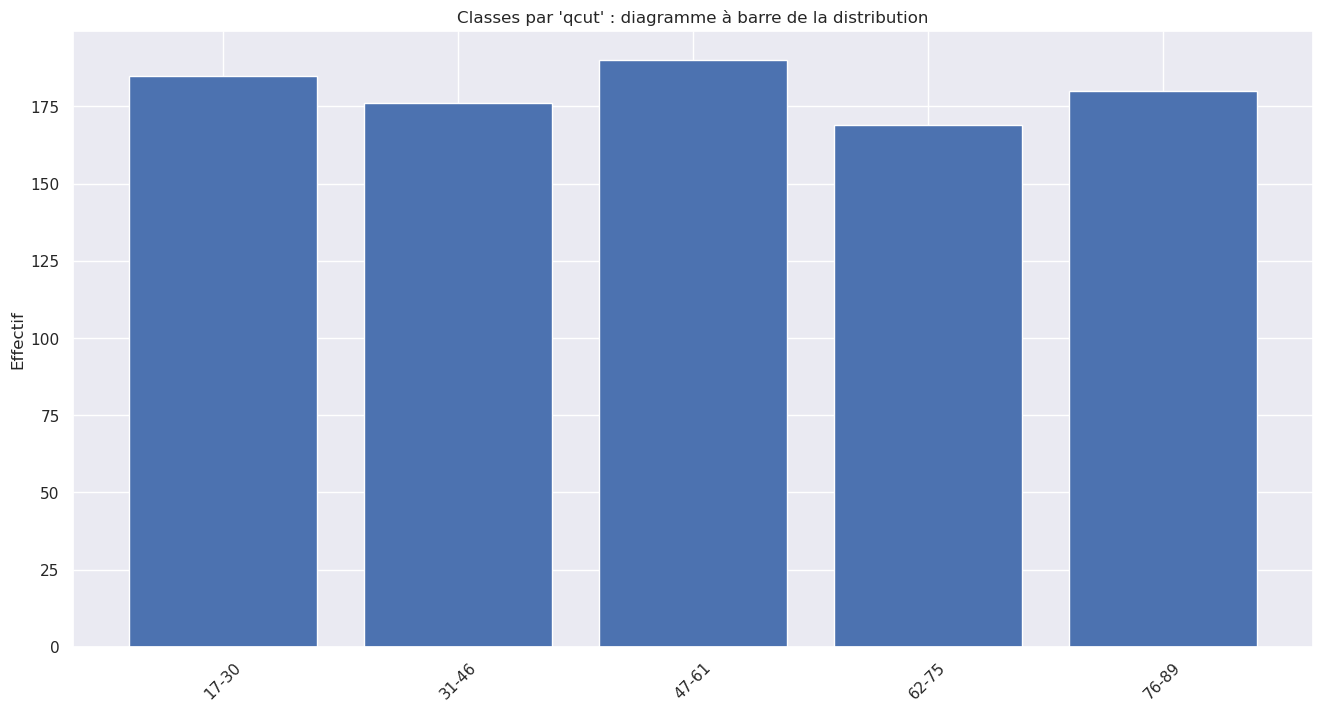

In [80]:
### Diagramme à barre, non adapté et trompeur: ce n'est pas un vrai histogramme
# Attention aux différentes étendues des ages, les densités des tranches sont différentes

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title(f"Classes par '{nom}' : diagramme à barre de la distribution")
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Histogramme

<Axes: >

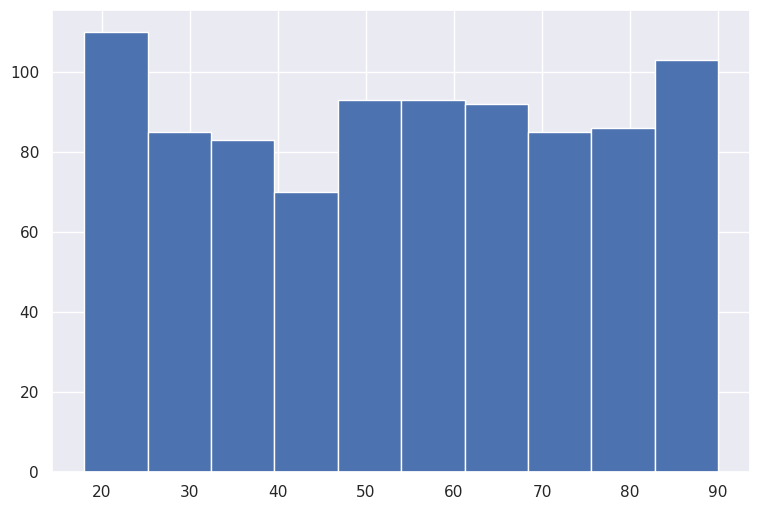

In [76]:
### Représentation automatique
# Dix classes de la même amplitude en abscisses, effectifs (!) en ordonnées

c_obs['age'].hist()

### Application aux différents découpages des générations (exemples)

In [81]:
gb_generation_heur = gb_generation_heur.reset_index()
gb_generation_heur.columns=['generation', 'effectif']
gb_generation_heur

,generation,effectif
0,18-25,110
1,26-35,129
2,36-45,94
3,46-55,130
4,56-65,123
5,66-90,314


In [82]:
gb_generation_qcut = gb_generation_qcut.reset_index()
gb_generation_qcut.columns=['generation', 'effectif']
gb_generation_qcut

,generation,effectif
0,17-30,185
1,31-46,176
2,47-61,190
3,62-75,169
4,76-89,180


In [83]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [84]:
### Séparer et préparer les différentes valeurs
def preparer_valeurs(df):
    df['frequence'] = (df['effectif']/df['effectif'].sum()).round(4)
    df['densité'] = df.apply(calculer_densite, axis=1)
    df['start'] = df.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
    df['width'] = df.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
    return df

In [85]:
ndf = preparer_valeurs(gb_generation_heur)
ndf

,generation,effectif,frequence,densité,start,width
0,18-25,110,0.1222,0.0175,18,7
1,26-35,129,0.1433,0.0159,26,9
2,36-45,94,0.1044,0.0116,36,9
3,46-55,130,0.1444,0.0160,46,9
4,56-65,123,0.1367,0.0152,56,9
5,66-90,314,0.3489,0.0145,66,24


In [86]:
ndf1 = preparer_valeurs(gb_generation_qcut)
ndf1

,generation,effectif,frequence,densité,start,width
0,17-30,185,0.2056,0.0158,17,13
1,31-46,176,0.1956,0.0130,31,15
2,47-61,190,0.2111,0.0151,47,14
3,62-75,169,0.1878,0.0144,62,13
4,76-89,180,0.2000,0.0154,76,13


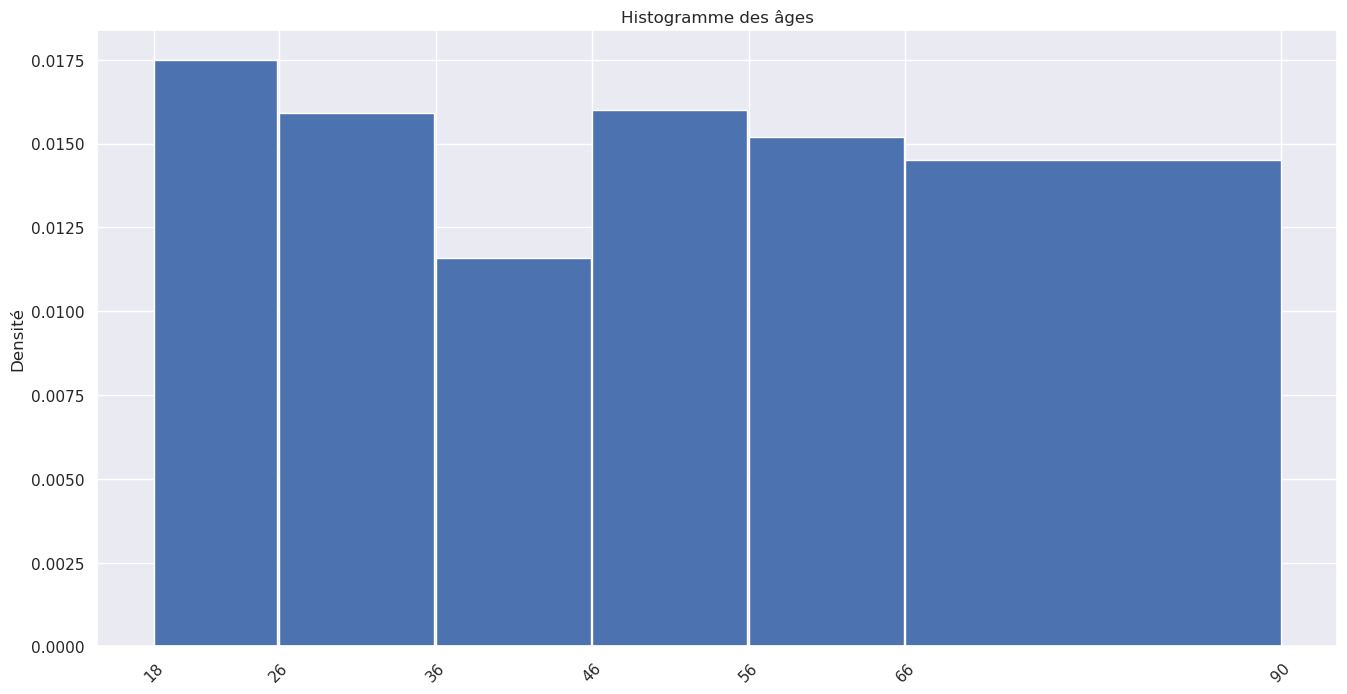

In [87]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale

## Exécuter alternativement et observer ndf et ndf1

df = ndf # ndf ndf1

fig,ax = plt.subplots(1,1)

objects = [l for l in df['start']]
eff = [l for l in df['densité']]
width = [l+0.9 if l < 10 else l for l in df['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 66, 90])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Pyramide des ages

In [152]:
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,lustres
id,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,83-87
2,31,H,4466,de temps en temps,gauche,26-35,18-31,17-30,28-32
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,78-82


In [153]:
### Ajouter une colonne avec codage des années de naissance par lustres (périodes de 5 ans)
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

lustres = list(range(18, 97, 5))
c_obs['lustres'] = pd.cut(c_obs['age'], lustres, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['lustres'] = c_obs['lustres'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,gender,revenu_mensuel,lecture_journal,parti,generation_heur,generation_cut,generation_qcut,lustres
id,,,,,,,,,
1,87,F,7410,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,83-87
2,31,H,4466,de temps en temps,gauche,26-35,18-31,17-30,28-32
3,79,F,5515,trois-quatre fois par semaine,populiste,66-90,75-89,76-89,78-82


In [154]:
gb_gen_lustre= c_obs[['gender', 'lustres']].groupby(by=['gender', 'lustres']).size()
gb_gen_lustre

gender  lustres
F       18-22      39
        23-27      43
        28-32      29
        33-37      31
        38-42      21
        43-47      27
        48-52      29
        53-57      28
        58-62      35
        63-67      28
        68-72      33
        73-77      22
        78-82      33
        83-87      30
        88-92      27
H       18-22      24
        23-27      32
        28-32      28
        33-37      33
        38-42      31
        43-47      23
        48-52      38
        53-57      24
        58-62      36
        63-67      35
        68-72      29
        73-77      36
        78-82      30
        83-87      32
        88-92      14
dtype: int64

In [155]:
gb_gen_lustre=gb_gen_lustre.reset_index()
gb_gen_lustre.columns=['gender','lustre', 'effectif']
gb_gen_lustre

,gender,lustre,effectif
0,F,18-22,39
1,F,23-27,43
2,F,28-32,29
3,F,33-37,31
4,F,38-42,21
5,F,43-47,27
6,F,48-52,29
7,F,53-57,28
8,F,58-62,35
9,F,63-67,28


In [156]:
df_lu_f = pd.DataFrame(gb_gen_lustre[['lustre', 'effectif']][gb_gen_lustre['gender'] == 'F'])
df_lu_f.columns=['lustre', 'femmes']
df_lu_f

,lustre,femmes
0,18-22,39
1,23-27,43
2,28-32,29
3,33-37,31
4,38-42,21
5,43-47,27
6,48-52,29
7,53-57,28
8,58-62,35
9,63-67,28


In [157]:
df_lu_h = pd.DataFrame(gb_gen_lustre[['lustre', 'effectif']][gb_gen_lustre['gender'] == 'H'])
df_lu_h.columns=['lustre', 'hommes']
df_lu_h

,lustre,hommes
15,18-22,24
16,23-27,32
17,28-32,28
18,33-37,33
19,38-42,31
20,43-47,23
21,48-52,38
22,53-57,24
23,58-62,36
24,63-67,35


In [158]:
df_gen_lustre = pd.merge(df_lu_f, df_lu_h, how='inner', on='lustre')
df_gen_lustre

,lustre,femmes,hommes
0,18-22,39,24
1,23-27,43,32
2,28-32,29,28
3,33-37,31,33
4,38-42,21,31
5,43-47,27,23
6,48-52,29,38
7,53-57,28,24
8,58-62,35,36
9,63-67,28,35


In [159]:
df_gen_lustre['hommes'] = df_gen_lustre['hommes'].apply(lambda x : x*-1)
df_gen_lustre

,lustre,femmes,hommes
0,18-22,39,-24
1,23-27,43,-32
2,28-32,29,-28
3,33-37,31,-33
4,38-42,21,-31
5,43-47,27,-23
6,48-52,29,-38
7,53-57,28,-24
8,58-62,35,-36
9,63-67,28,-35


In [160]:
lrev = copy.deepcopy(list(df_gen_lustre['lustre']))
lrev.reverse()
print(lrev)

['88-92', '83-87', '78-82', '73-77', '68-72', '63-67', '58-62', '53-57', '48-52', '43-47', '38-42', '33-37', '28-32', '23-27', '18-22']


[]

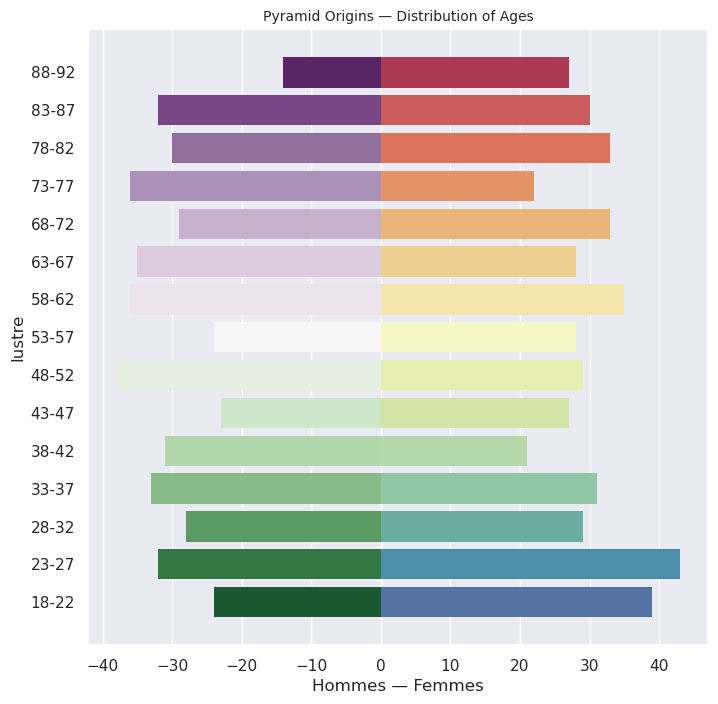

In [162]:

# https://towardsdatascience.com/different-bar-charts-in-python-6d984b9c6b17

# Prepare Data
plt.rcParams["figure.figsize"] = (8,8)

#Class
AgeClass = lrev
#Chart
bar_plot = sns.barplot(x='femmes', y='lustre', data=df_gen_lustre, order=AgeClass, lw=0, palette="Spectral")
bar_plot = sns.barplot(x='hommes', y='lustre', data=df_gen_lustre, order=AgeClass, lw=0, palette="PRGn")
plt.title("Pyramid Origins — Distribution of Ages", fontsize=10)
plt.xlabel("Hommes — Femmes")
# plt.savefig('graphics/pyramid_origins_age_1860.jpg')
plt.plot()

## Distribution de probabilité normale et standardisée

* [Loi normale](https://fr.wikipedia.org/wiki/Loi_normale) (Wikpedia)
* Ci-dessous, représentation utilisant les librairies Numpy (pour produire les données) et Seaborn (pour les représenter)

### QQ Plots
"Q-Q plots are a handy tool for visually inspecting how well your data matches a known probability distribution (prob dsn). If the match is good, the data should line up more or less diagonally in the Q-Q plot. A common usage is to verify normality, i.e. how well the data matches a Normal or Gaussian dsn."
https://www.r-bloggers.com/2011/08/q-q-plots-for-multi-modal-performance-data/

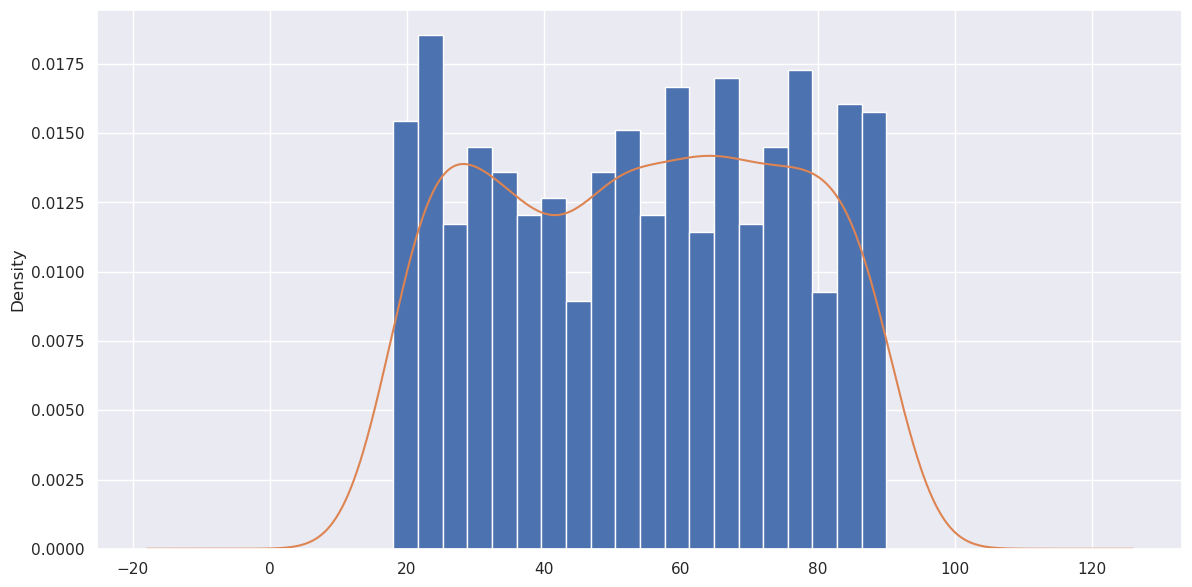

In [53]:
### Représentation automatique
# Densité !
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html
# https://stackoverflow.com/questions/25577317/pandas-histogram-in-python-possible-to-make-probability-density-instead-of-coun

c_obs['age'].plot(kind='hist', density=True, bins=20)
c_obs['age'].plot.kde()
plt.show()

In [54]:
## Ajout d'une colonne avec distribution normalisée
age = c_obs['age']

m = age.mean()
std = age.std()
print(m, std, '\n')
c_obs['age_norm'] = c_obs['age'].apply(lambda x : (x-m)/std )
c_obs.head(2)

54.05555555555556 21.382610750709937 



,age,n_foyer,lecture_journal,parti,gender,revenu_mensuel,generation_heur,generation_cut,generation_qcut,age_norm
id,,,,,,,,,,
1,87,7,trois-quatre fois par semaine,populiste,F,7410,66-90,75-89,76-89,1.540712
2,31,4,de temps en temps,gauche,H,4466,26-35,18-31,17-30,-1.078239


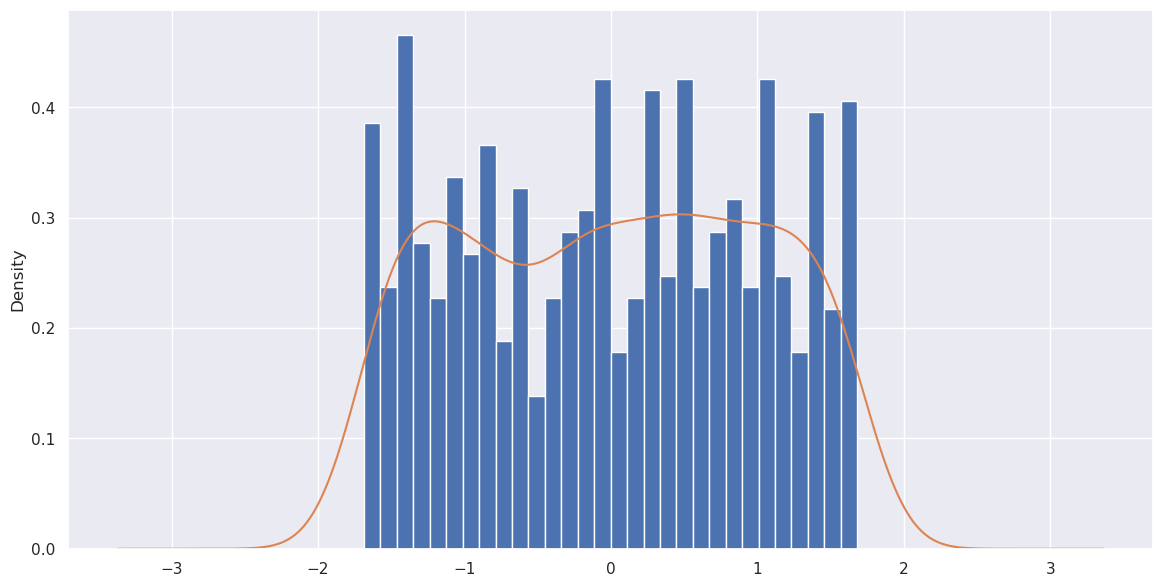

In [55]:
c_obs['age_norm'].plot(kind='hist', density=True, bins=30)
c_obs['age_norm'].plot.kde()
plt.show()

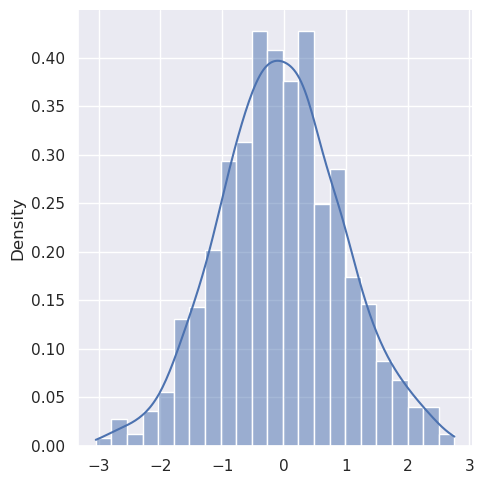

In [56]:
### Probabilité totale = aire sous la courbe = 1
# https://seaborn.pydata.org/tutorial/distributions.html
# https://www.statology.org/seaborn-normal-distribution/

np.random.seed(0)

# Crée un jeu de donnes artificiel en forme normale 
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True, stat='density')

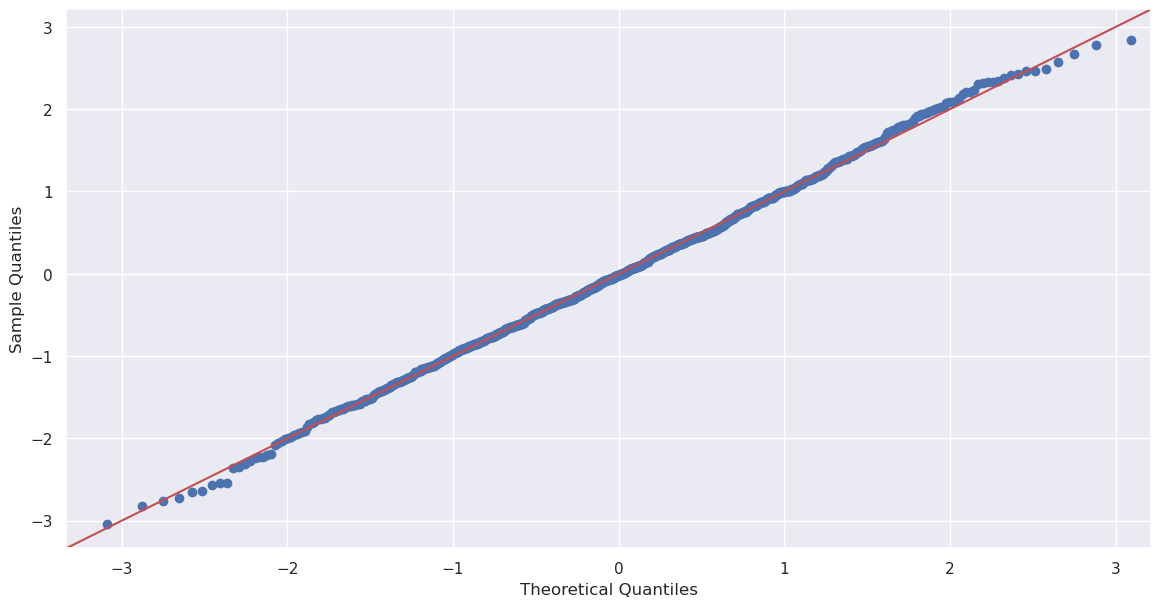

In [57]:
## QQ Plot d'une distribution normale
# https://www.statology.org/q-q-plot-python/
sm.qqplot(x, line='45', fit=True)
plt.show()

In [58]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
# https://www.statology.org/shapiro-wilk-test-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
stats.shapiro(x)
# Commentaire: la valeur de probabilité n'étant pas inférieure à 0.05 on ne peut par rejeteur l'H0 et donc la distribution est normale à 95% de probabilitéc

ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)

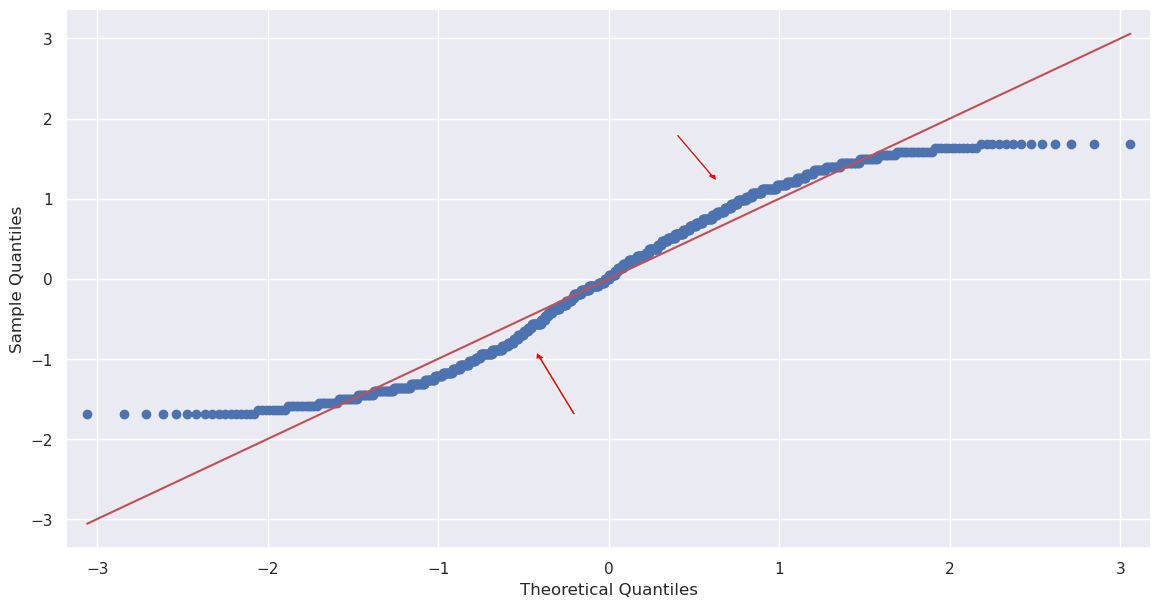

In [59]:
### QQ Plot des données concernant l'age de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
sm.qqplot(age, line='s', fit=True)
plt.arrow(x=-0.2, y=-1.7, dx=-0.2, dy=+0.7, width=.02, facecolor='red') 
plt.arrow(x=0.4, y=1.8, dx=0.2, dy=-0.5, width=.02, facecolor='red') 
plt.show()

In [60]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
sa = stats.shapiro(age)
# Commentaire: la valeur de probabilité est 0.000024199 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

In [61]:
from decimal import Decimal
print(f'Valeur p en décimales: {Decimal(sa.pvalue)} ({sa.statistic}, {sa.pvalue})')

Valeur p en décimales: 8.450067518002394467181714876602427466423250734806060791015625E-17 (0.9506165385246277, 8.450067518002394e-17)


Cette distribution a une apparence bimodale:
* Bimodal/multimodal probability distribution: https://en.wikipedia.org/wiki/Multimodal_distribution
* https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f



#### Commentaire du graphique

On note que l'accroissement de la richesse ne suit pas celui de la population:
* à la médiane de la population (indiquée par la ligne vertical rouge qui indique les 50% de la fréquence cumulée) on n'a atteint qu'autour de 30% des salaires cumulés 
* les 20 % les plus riches de la population accumulent presque 40 % des revenus